# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [1]:
import numpy as np
import pandas as pd
from nn_utils import *

In [2]:
n_hidden_layers = 3
n_neurons = 5
n_outputs = 3
n_inputs = 10

net = NeuralNetwork()
net.add_input_layer(10)

net.add_hidden_layer(10, 15)
net.add_hidden_layer(15, 14)
net.add_hidden_layer(14, 14)
net.add_output_layer(14, 3)


print(net)
print(net.number_of_nodes())

INPUT LAYER: 
NODE 0 OUTPUT = 0.0
NODE 1 OUTPUT = 0.0
NODE 2 OUTPUT = 0.0
NODE 3 OUTPUT = 0.0
NODE 4 OUTPUT = 0.0
NODE 5 OUTPUT = 0.0
NODE 6 OUTPUT = 0.0
NODE 7 OUTPUT = 0.0
NODE 8 OUTPUT = 0.0
NODE 9 OUTPUT = 0.0

LAYER 0 
NODE 0 WEIGHTS = -0.09600537550263824, 0.41301878932576574, 0.44332988192808664, 0.07048362580430233, 0.22295320155851397, -0.3654502681637357, 0.46629498056160007, 0.17564501410380767, -0.11841153287738229, 0.16715322643707592,  BIAS = 0.0
NODE 1 WEIGHTS = -0.21210634412745594, -0.04502240212752339, 0.006711476038751337, -0.22415847412343695, -0.03278892724281107, 0.20499829396040653, 0.14499690319827016, 0.004479047503269846, 0.05957540161590826, -0.07767977298403844,  BIAS = 0.0
NODE 2 WEIGHTS = 0.11753819529756618, 0.13817137436061908, 0.012903979802886037, -0.17716590222925044, -0.25678460613274345, -0.0041213999556839395, 0.2515340874128266, 0.46422188429512684, -0.5924045698968102, -0.2559773228669166,  BIAS = 0.0
NODE 3 WEIGHTS = -0.07141030163913376, -0.558

In [3]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.803560,-0.878859,-0.978391,0.957539,0.996655,0.996924,-0.226305,0.097814,-0.922666,0.934153,15.389553,-41.068806,27.513502
996,0.718841,0.995748,-0.942678,0.999929,0.747763,-0.808726,0.176132,0.999100,-0.753970,-0.969009,-36.228770,13.067430,11.672133
997,-0.977912,-0.971108,0.956233,-0.979524,0.222033,0.986609,0.658273,-0.987310,0.937697,0.143420,7.265506,-53.497242,2.815666
998,0.284803,-0.988684,-0.427197,0.883317,0.993302,0.999500,-0.019456,-0.648110,-0.955231,0.901298,5.545274,-63.348396,27.989340



# Preparing Dataframe
i.e. creating the training set by removing non-training columns


In [4]:
# shuffle data
data = data.sample(frac=1)

In [5]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
17,0.891745,0.821807,0.925741,0.466906,-0.981792,-0.916250,-0.288479,0.986429,0.875373,-0.999734,-37.834110,-0.144540,5.457675
954,0.900341,0.840673,-0.373929,0.998566,0.948125,0.855322,-0.349020,0.998675,-0.952544,-0.955686,-45.983760,0.239661,30.545220
727,0.106918,-0.398283,-0.951825,0.996644,0.995006,0.994797,0.653670,0.968158,-0.618124,-0.912197,-25.173060,-27.135962,22.735708
102,0.932640,-0.992060,0.979284,-0.991983,0.895976,0.981953,0.074303,-0.201555,0.170611,-0.800217,-24.157822,-54.962910,16.238201
12,-0.877142,0.997698,-0.997844,0.999913,0.904342,-0.657521,0.691509,0.981739,0.305082,-0.803742,-10.238073,6.206751,5.935548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.919953,0.979687,-0.643724,0.999849,0.819928,-0.081385,0.408615,0.999476,-0.865890,-0.983984,-47.027120,7.362587,18.008200
26,0.993172,0.829590,0.778088,0.994716,0.151789,0.747123,0.041514,0.998451,-0.936416,-0.987079,-64.875580,0.602405,23.695478
217,0.199660,-0.990963,0.535124,0.755811,0.991847,0.999655,0.513765,-0.875172,-0.961479,0.892217,4.102126,-69.388275,21.863165
22,0.975706,-0.916083,0.995357,-0.969456,-0.909366,0.533735,0.559306,0.911171,0.377028,-0.997545,-56.643700,-20.640207,4.322106


total Error pre-training = 1149.6190375765332


Epoch = 1, total Error post-training = 1125.8827748575873
Epoch = 2, total Error post-training = 1084.965018965266
Epoch = 3, total Error post-training = 990.0080576450939
Epoch = 4, total Error post-training = 821.9491145933493
Epoch = 5, total Error post-training = 671.3738213187598
Epoch = 6, total Error post-training = 555.9688019932782
Epoch = 7, total Error post-training = 492.30053042731527
Epoch = 8, total Error post-training = 439.7550424461171
Epoch = 9, total Error post-training = 356.2698173634882
Epoch = 10, total Error post-training = 379.35194315937093
Epoch = 11, total Error post-training = 289.9529565122687
Epoch = 12, total Error post-training = 382.14404736937627
Epoch = 13, total Error post-training = 238.0282827085531
Epoch = 14, total Error post-training = 350.7897081148199
Epoch = 15, total Error post-training = 191.00507349779667
Epoch = 16, total Error post-training = 325.111785587149
Epoch = 17, total Error post-training = 172.4874231422589
Epoch = 18, total E

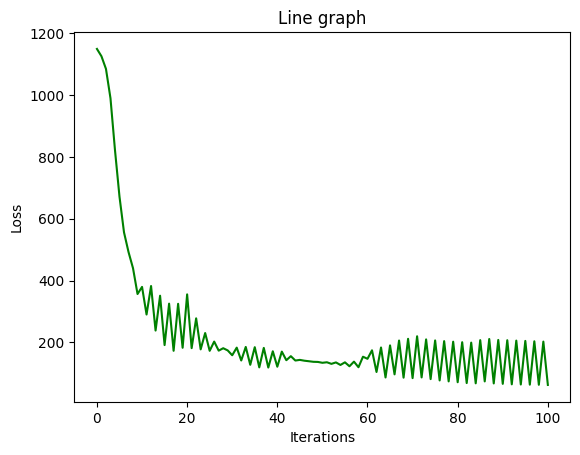

In [6]:
tr_data_X = data[['Input1', 'Input2', 'Input3', 'Input4',
                  'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10']]

tr_data_Y = data[['TARGET_x', 'TARGET_y', 'TARGET_z']]

# act_fun possible values: "relu", "leaky_relu", "tanh", "sigmoid"

losses = net.train(tr_data_X, tr_data_Y, epochs=100,
                 eta=0.01, clip_value=10000, act_fun="relu")
#print(net)
#print(net.input_layer.weights)

plot_loss(losses)


In [7]:
np.dot(net.hidden_layers[0].output, net.hidden_layers[1].weights)

array([ 6.6105242 ,  0.08206604, 11.63616897, -3.79270529, -0.71540415,
       -2.27479573, -3.38051083,  2.20958504,  0.51990967,  0.85212392,
       -2.67982063, -1.47384878,  0.31432086, -1.22376506])

In [8]:
net.output_layer.output

array([-66.11080925, -12.92805092,  31.83028385])

In [9]:
for row, label in zip(tr_data_X.itertuples(index=False, name=None), tr_data_Y.itertuples(index=False, name=None)):
    # Forward propagation
    net.forwardPropagation( row, label, act_fun = "relu")
    print(np.array(label))
    print(net.output_layer.output)
    break

[-37.83411     -0.14454013   5.457675  ]
[-61.23780684   5.27454664  11.28522755]


In [10]:
a = np.array([10, -3])

In [11]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [12]:
leaky_relu(a)

array([10.  , -0.03])

In [13]:
def clip_gradients(gradients, clip_value):
    clipped_gradients = []
    for gradient in gradients:
        clipped_gradient = np.clip(gradient, -clip_value, clip_value)
        clipped_gradients.append(clipped_gradient)
    return clipped_gradients

In [14]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
17,0.891745,0.821807,0.925741,0.466906,-0.981792,-0.916250,-0.288479,0.986429,0.875373,-0.999734,-37.834110,-0.144540,5.457675
954,0.900341,0.840673,-0.373929,0.998566,0.948125,0.855322,-0.349020,0.998675,-0.952544,-0.955686,-45.983760,0.239661,30.545220
727,0.106918,-0.398283,-0.951825,0.996644,0.995006,0.994797,0.653670,0.968158,-0.618124,-0.912197,-25.173060,-27.135962,22.735708
102,0.932640,-0.992060,0.979284,-0.991983,0.895976,0.981953,0.074303,-0.201555,0.170611,-0.800217,-24.157822,-54.962910,16.238201
12,-0.877142,0.997698,-0.997844,0.999913,0.904342,-0.657521,0.691509,0.981739,0.305082,-0.803742,-10.238073,6.206751,5.935548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.919953,0.979687,-0.643724,0.999849,0.819928,-0.081385,0.408615,0.999476,-0.865890,-0.983984,-47.027120,7.362587,18.008200
26,0.993172,0.829590,0.778088,0.994716,0.151789,0.747123,0.041514,0.998451,-0.936416,-0.987079,-64.875580,0.602405,23.695478
217,0.199660,-0.990963,0.535124,0.755811,0.991847,0.999655,0.513765,-0.875172,-0.961479,0.892217,4.102126,-69.388275,21.863165
22,0.975706,-0.916083,0.995357,-0.969456,-0.909366,0.533735,0.559306,0.911171,0.377028,-0.997545,-56.643700,-20.640207,4.322106
